In [1]:
import pandas as pd
from pathlib import Path

def safe_read_freq_csv(path, index_col_name):
	p = Path(path)
	if not p.exists():
		print(f"Warning: '{path}' not found. Creating empty frequency Series for '{index_col_name}'.")
		df = pd.DataFrame(columns=[index_col_name, 'Häufigkeit'])
	else:
		df = pd.read_csv(p)
	if index_col_name in df.columns and 'Häufigkeit' in df.columns:
		return df.set_index(index_col_name)['Häufigkeit'].sort_values(ascending=False)
	else:
		# return an empty Series with the expected name to avoid downstream errors
		return pd.Series(dtype=float, name='Häufigkeit')

DE_MONO_FREQ = safe_read_freq_csv('de_mono.csv', 'Buchstabe')
print(DE_MONO_FREQ)

DE_BI_FREQ = safe_read_freq_csv('de_bi.csv', 'Biagramm')
print(DE_BI_FREQ)

DE_TRI_FREQ = safe_read_freq_csv('de_tri.csv', 'Triagramm')
print(DE_TRI_FREQ)


Buchstabe
E    0.1609
N    0.0886
I    0.0774
R    0.0767
A    0.0654
S    0.0640
T    0.0623
D    0.0458
U    0.0410
L    0.0407
H    0.0402
O    0.0367
G    0.0309
C    0.0291
M    0.0263
B    0.0223
F    0.0192
K    0.0168
W    0.0142
P    0.0134
Z    0.0107
V    0.0094
J    0.0031
Y    0.0031
X    0.0013
Q    0.0005
Name: Häufigkeit, dtype: float64
Biagramm
EN     3.90
ER     3.44
CH     3.10
TE     2.50
DE     2.36
IN     2.34
ND     2.15
EI     2.05
UN     1.83
AU     1.70
AN     1.63
SC     1.58
GE     1.50
ES     1.48
NE     1.40
HE     1.35
IS     1.33
ICH    1.25
ST     1.20
DI     1.15
Name: Häufigkeit, dtype: float64
Triagramm
SCH    0.0090
DER    0.0085
EIN    0.0078
DEN    0.0070
UND    0.0065
ERE    0.0058
ICH    0.0055
DIE    0.0052
NDE    0.0050
STE    0.0048
CHA    0.0045
GEN    0.0042
TER    0.0040
AUF    0.0038
TEN    0.0035
Name: Häufigkeit, dtype: float64


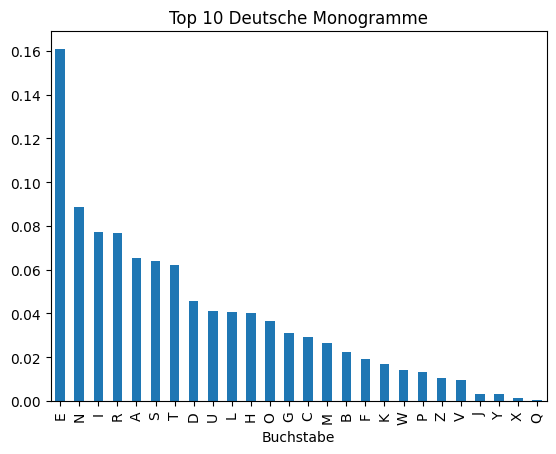

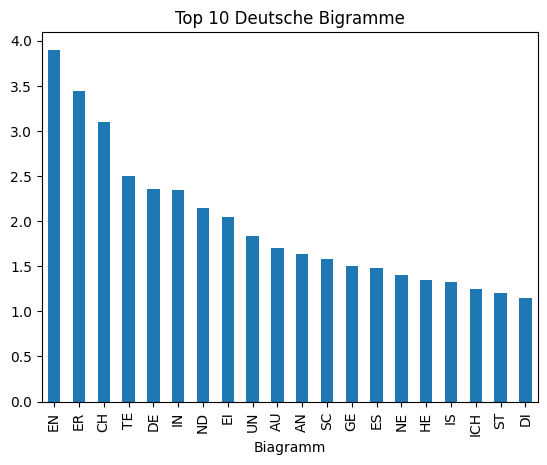

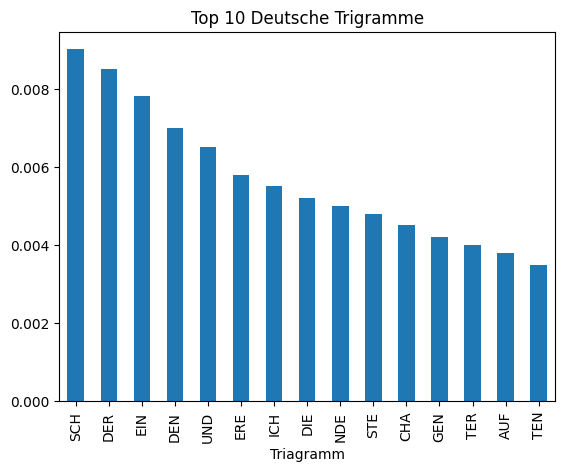

In [2]:
import matplotlib.pyplot as plt
DE_MONO_FREQ.plot(kind='bar', title='Top 10 Deutsche Monogramme')
plt.show()  

DE_BI_FREQ.plot(kind='bar', title='Top 10 Deutsche Bigramme')
plt.show()

DE_TRI_FREQ.plot(kind='bar', title='Top 10 Deutsche Trigramme')
plt.show()  

In [3]:
DE_MONO_FREQ = DE_MONO_FREQ.to_dict()
DE_MONO_CHARS = list(DE_MONO_FREQ.keys())

DE_BI_FREQ = DE_BI_FREQ.to_dict()
DE_BI_CHARS = list(DE_BI_FREQ.keys())

DE_TRI_FREQ = DE_TRI_FREQ.to_dict()
DE_TRI_CHARS = list(DE_TRI_FREQ.keys())

In [4]:
def bereinige_text(text):
    text = text.upper()
    sauberer_text = ''
    for char in text:
        if 'A' <= char <= 'Z' or char == ' ':
            sauberer_text += char
    return sauberer_text

In [5]:
def zaehle_frequenzen(text):
    ALPHABET = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ '
    text = bereinige_text(text)
    n = len(text)
    if n == 0:
        return {}, {}, {}
    mono_counts = {char: 0 for char in ALPHABET}
    for char in text:
        mono_counts[char] += 1
    mono_freq = {char: count / n for char, count in mono_counts.items()}
    mono_freq_sorted = dict(sorted(mono_freq.items(), key=lambda item: item[1], reverse=True))

    bi_counts = {}
    for i in range(n - 1):
        biagram = text[i:i+2]
        bi_counts[biagram] = bi_counts.get(biagram, 0) + 1

    bi_freq = {biagram: count / (n - 1) for biagram, count in bi_counts.items()}
    bi_freq_sorted = dict(sorted(bi_freq.items(), key=lambda item: item[1], reverse=True))

    tri_counts = {}
    for i in range(n - 2):
        triagram = text[i:i+3]
        tri_counts[triagram] = tri_counts.get(triagram, 0) + 1

    tri_freq = {triagram: count / (n - 2) for triagram, count in tri_counts.items()}
    tri_freq_sorted = dict(sorted(tri_freq.items(), key=lambda item: item[1], reverse=True))

    return mono_freq_sorted, bi_freq_sorted, tri_freq_sorted

In [6]:
def frequenz_angriff(ciphertext):
    mono_freq, bi_freq, tri_freq = zaehle_frequenzen(ciphertext)
    
    mono_freq_chars = list(mono_freq.keys())
    klar_mono_chars = DE_MONO_CHARS

    schluessel_mono = {}
    num_to_map = min(len(mono_freq_chars), len(klar_mono_chars))
    for i in range(num_to_map):
       geheim_char = mono_freq_chars[i]
       klar_char = klar_mono_chars[i]
       schluessel_mono[geheim_char] = klar_char

    print("\n[Häufigkeits-Analyse des Geheimtextes]")
    print(f"Top 10 Geheimtext-Buchstaben (nach Häufigkeit): {mono_freq_chars[:10]}")
    print(f"Top 10 Deutsche Klartext-Buchstaben:            {klar_mono_chars[:10]}")
    print(f"Vorgeschlagener Anfangsschlüssel (Geheim -> Klar):")
    
    # Ausgabe der Top 10 Mappings
    top_mappings = {k: schluessel_mono[k] for k in mono_freq_chars[:10] if k in schluessel_mono}
    print(top_mappings)

    print("\nTop 5 Geheimtext Bigramme: ")
    print(list(bi_freq.keys())[:5])
    print(f"Häufigste deutsche Bigramme: {DE_BI_CHARS[:5]}")
    
    print("\nTop 5 Geheimtext Trigramme: ")
    print(list(tri_freq.keys())[:5])
    print(f"Häufigste deutsche Trigramme: {DE_TRI_CHARS[:5]}")

    

In [7]:
def entschluesseln(ciphertext, schluessel):
    """Wendet eine einfache Substitutionsabbildung (schluessel: dict) auf den ciphertext an."""
    plaintext = ''
    for char in ciphertext:
        if char in schluessel:
            plaintext += schluessel[char]
        else:
            plaintext += char  # Unveränderte Zeichen beibehalten
    return plaintext

# Alias für Kompatibilität, falls andere Zellen den anderen Namen benutzen
emtschluesseln = entschluesseln

# Erzeuge einen vorgeschlagenen Anfangsschlüssel basierend auf Monogramm-Häufigkeiten
# (Verwendet zaehle_frequenzen und DE_MONO_CHARS aus anderen Zellen)
mono_freq, _, _ = zaehle_frequenzen(ciphertext)
mono_freq_chars = list(mono_freq.keys())
klar_mono_chars = DE_MONO_CHARS

vorgeschlagener_schluessel = {}
num_to_map = min(len(mono_freq_chars), len(klar_mono_chars))
for i in range(num_to_map):
    geheim_char = mono_freq_chars[i]
    klar_char = klar_mono_chars[i]
    vorgeschlagener_schluessel[geheim_char] = klar_char

# Wende den vorgeschlagenen Schlüssel an und zeige das Ergebnis
versuchter_klartext = entschluesseln(ciphertext, vorgeschlagener_schluessel)

print("\n[Ergebnis der Monogramm-Substitution]")
print(f"Versuchter Klartext:\n{versuchter_klartext}")

# Gebe den Vorschlag zurück (als letzte Expression in der Zelle wird er im Notebook angezeigt)
vorgeschlagener_schluessel

NameError: name 'ciphertext' is not defined

In [ ]:

cipher_path = Path('ciphertext.txt')
if not cipher_path.exists():
    print("Warning: 'ciphertext.txt' not found. Please ensure the file exists in the notebook working directory.")
    ciphertext = ''
else:
    # use pathlib to read the file so no lingering open file object remains in the notebook globals
    ciphertext = cipher_path.read_text(encoding='utf-8')

if ciphertext:
    frequenz_angriff(ciphertext)
else:
    print("No ciphertext to analyze.")

    


[Häufigkeits-Analyse des Geheimtextes]
Top 10 Geheimtext-Buchstaben (nach Häufigkeit): [' ', 'P', 'U', 'L', 'G', 'N', 'Y', 'C', 'S', 'F']
Top 10 Deutsche Klartext-Buchstaben:            ['E', 'N', 'I', 'R', 'A', 'S', 'T', 'D', 'U', 'L']
Vorgeschlagener Anfangsschlüssel (Geheim -> Klar):
{' ': 'E', 'P': 'N', 'U': 'I', 'L': 'R', 'G': 'A', 'N': 'S', 'Y': 'T', 'C': 'D', 'S': 'U', 'F': 'L'}

Top 5 Geheimtext Bigramme: 
['U ', 'N ', ' G', 'PY', 'LU']
Häufigste deutsche Bigramme: ['EN', 'ER', 'CH', 'TE', 'DE']

Top 5 Geheimtext Trigramme: 
['PY ', ' CP', 'PLU', 'PU ', 'N C']
Häufigste deutsche Trigramme: ['SCH', 'DER', 'EIN', 'DEN', 'UND']
